<a href="https://colab.research.google.com/github/sbuitragoo/Seed_Segmentation/blob/master/SeedSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tomato Seeds Segmentation Using Deep Learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os

## Clone Repository

In [ ]:
!git clone https://github.com/sbuitragoo/Seed_Segmentation.git

Cloning into 'Seed_Segmentation'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 157 (delta 93), reused 115 (delta 51), pack-reused 0
Receiving objects: 100% (157/157), 7.23 MiB | 25.72 MiB/s, done.
Resolving deltas: 100% (93/93), done.


## Load Images

In [ ]:
FILEID = "1yMLQLZ-YJuPU-FThSQkuTsk-zzJM_kRS"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2022-05-21 01:33:26--  https://docs.google.com/uc?export=download&confirm=t&id=1yMLQLZ-YJuPU-FThSQkuTsk-zzJM_kRS
Resolving docs.google.com (docs.google.com)... 173.194.214.138, 173.194.214.102, 173.194.214.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.214.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pr8m7m21810te98o4d56b241nr02rmu6/1653096750000/18352272617949874006/*/1yMLQLZ-YJuPU-FThSQkuTsk-zzJM_kRS?e=download [following]
--2022-05-21 01:33:26--  https://doc-04-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pr8m7m21810te98o4d56b241nr02rmu6/1653096750000/18352272617949874006/*/1yMLQLZ-YJuPU-FThSQkuTsk-zzJM_kRS?e=download
Resolving doc-04-2s-docs.googleusercontent.com (doc-04-2s-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-04-2s-docs.googleusercontent.com (doc-

## Visualization

In [ ]:
%cd Seed_Segmentation/
from utils import load_data

/content/Seed_Segmentation


In [ ]:
%cd ..
X = load_data('DatasetE2/JPEGImages', quantity=5, resize=False)

/content


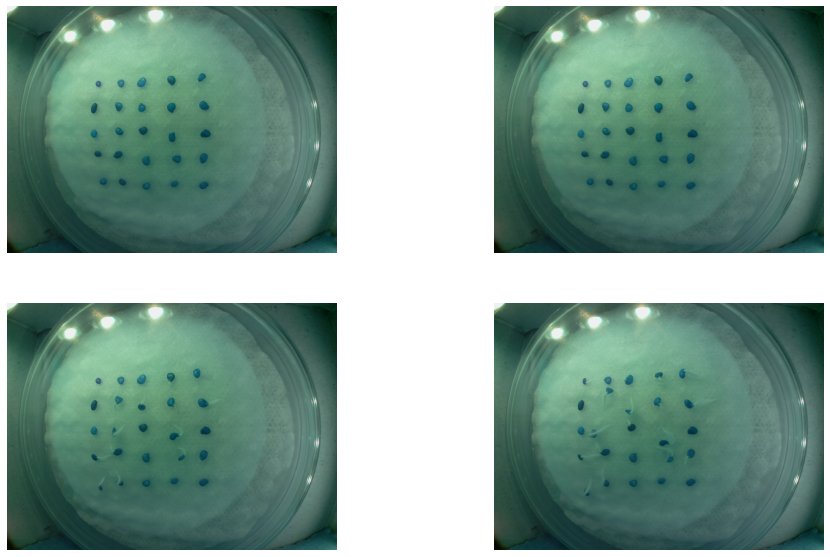

In [ ]:
plt.figure(figsize=(16,10))
for i in range(1,5):
  plt.subplot(2,2,i)
  plt.imshow(X[i])
  plt.axis('off')

In [ ]:
Y = load_data('DatasetE2/SegmentationClass', quantity=5, resize=False)

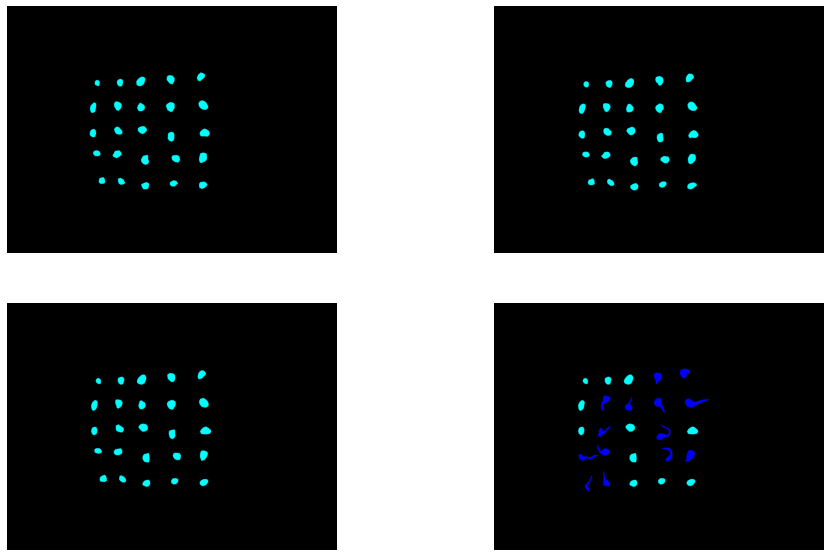

In [ ]:
plt.figure(figsize=(16,10))
for i in range(1,5):
  plt.subplot(2,2,i)
  plt.imshow(Y[i])
  plt.axis('off')

## Data Augmentation

In [ ]:
%cd Seed_Segmentation/DataManagementScripts

[Errno 2] No such file or directory: 'Seed_Segmentation/DataManagementScripts'
/content/Seed_Segmentation


In [ ]:
!python augmentation.py auto --imp ../../DatasetE2/JPEGImages/ --mp ../../DatasetE2/SegmentationClass/ --tp ../../DatasetE2/labelmap.txt --nim 150

Found 96 images belonging to 1 classes.
Found 96 images belonging to 1 classes.
Copying Original images
Generating 160 images
tcmalloc: large alloc 1887436800 bytes == 0x974e000 @  0x7f662d828001 0x7f65eac031af 0x7f65eac59c23 0x7f65eac5aa87 0x7f65eacfc823 0x5936cc 0x548c51 0x5127f1 0x549e0e 0x593fce 0x511e2c 0x593dd7 0x511e2c 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x604173 0x5f5506 0x5f8c6c 0x5f9206 0x64faf2 0x64fc4e 0x7f662d423c87 0x5b621a
tcmalloc: large alloc 1887436800 bytes == 0x974e000 @  0x7f662d828001 0x7f65eac031af 0x7f65eac59c23 0x7f65eac5aa87 0x7f65eacfc823 0x5936cc 0x548c51 0x5127f1 0x549e0e 0x593fce 0x511e2c 0x593dd7 0x511e2c 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x604173 0x5f5506 0x5f8c6c 0x5f9206 0x64faf2 0x64fc4e 0x7f662d423c87 0x5b621a
1 / 5 done
tcmalloc: large alloc 1887436800 bytes == 0x974e000 @  0x7f662d828001 0x7f65eac031af 0x7f65eac59c23 0x7f65eac5aa87 0x7f65eacfc823 0x5936cc 0x548c51 0x5127f1 0x549e0e 0x593fce 0x511e2c 0x593dd7 0x511e2c 0x549576 0x

## TF Records

In [ ]:
!python tfRecords.py 

2022-05-21 02:00:57.475811: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


## Training

In [ ]:
%cd ..

/content/Seed_Segmentation


In [ ]:
!python train.py params --i ./augmentedDataPath/images --m ./augmentedDataPath/targets --model mobilenetv2 --size 224 --epochs 50 --batch 32 --mode tfrecord

2022-05-21 02:10:47.829048: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Epoch 1/50
     15/Unknown - 8s 29ms/step - loss: 0.2947 - accuracy: 0.9198
Epoch 1: saving model to weights
15/15 [==============================] - 10s 170ms/step - loss: 0.2947 - accuracy: 0.9198 - val_loss: 0.1042 - val_accuracy: 1.0000
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 0.0883 - accuracy: 0.9999
Epoch 2: saving model to weights
15/15 [==============================] - 4s 104ms/step - loss: 0.0883 - accuracy: 0.9999 - val_loss: 0.0759 - val_accuracy: 1.0000
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.9981
Epoch 3: saving model to weights
15/15 [==============================] - 5s 116ms/step - loss: 0.0568 - accuracy: 0.9981 - val_loss: 0.0497 - val_accuracy: 0.9963
Epoch 4/50
15/15 [=======

## Prediction

In [ ]:
!python predict.py arguments --i ./ --l ./ --out ./Predictions --size 224

## Model

In [ ]:
from Model import ModelToUse

Model = ModelToUse()
Model.print_available_models()
model = Model.get_model()
model.summary()
tf.keras.utils.plot_model(model)